# Voxel Designer - Truss Elements

In [1]:
using Plots
using LinearAlgebra
using NLopt
import JSON
using SparseArrays
using StaticArrays, BenchmarkTools
using Statistics

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling NLopt [76087f3c-5699-56af-9a33-bf431cd00edd]
└ @ Base loading.jl:1278


In [286]:
include("./julia/FEM_truss.jl")
include("./julia/compliant_mechanisms.jl")

simulateAndExport (generic function with 1 method)

In [287]:
function complianMechanismOptimization(fileName,scale,dmax,amax,maxeval=500,SIMP=false,threshold=0.25,exageration=100.0,save=true)
    
    setup = getSetup("json/$(fileName)")
    E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
    problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
    
    ##todo change based on hinge
#     free=map(node -> !node["restrained_degrees_of_freedom"][1], setup["nodes"])
    free=map(node ->map(deg -> !deg, node["restrained_degrees_of_freedom"]), setup["nodes"])
    free=reshape(collect(Iterators.flatten(free)),(6,size(Ls[1])[2]))[1:3,:]

    nel=length(setup["edges"])
    X=ones(nel)
    K,F,d,stress,dcomp,g=FEM_truss(problem,X);
    display("Original Domain:")
    display(plotTruss3D(problem,X,1.0))
    display("Optimization Details:")
    
    X=optimizeCompliantMechanism(problem,Ls,free,dmax,amax,maxeval,SIMP)
    display(plotTruss3D(problem,X,1.0))
    display("Final Design:")
    display("max:$(maximum(X)), min:$(minimum(X))")
    display(plotTrussDeformed3D(problem,copy(X),scale,threshold,exageration))
    
    if(save)
        K,F,d,stress,dcomp,g=FEM_truss(problem,X);
        simulateAndExport(setup,X,dcomp,"json/result_$(fileName)",threshold)
    end

    return X
    
end

complianMechanismOptimization (generic function with 6 methods)

## Regular/positive Poisson

"Original Domain:"

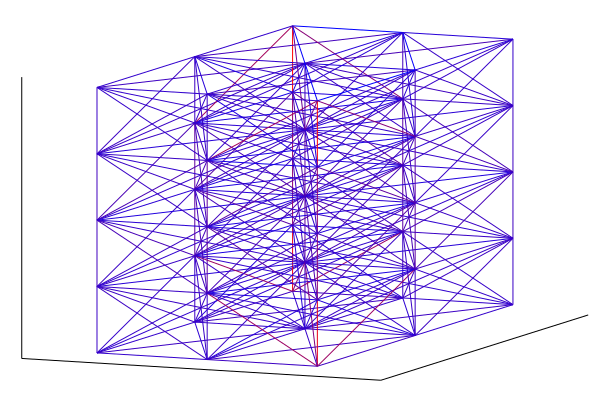

"Optimization Details:"

(63.64153551759199, [1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6  …  1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6], :XTOL_REACHED)

"got 63.64153551759199 after 18 iterations (returned XTOL_REACHED)"

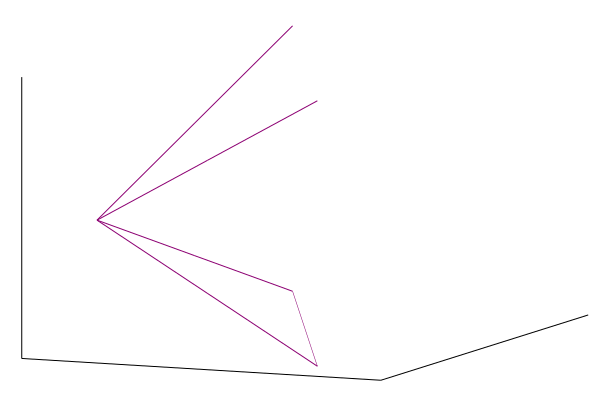

"Final Design:"

"max:1.0, min:1.0e-6"

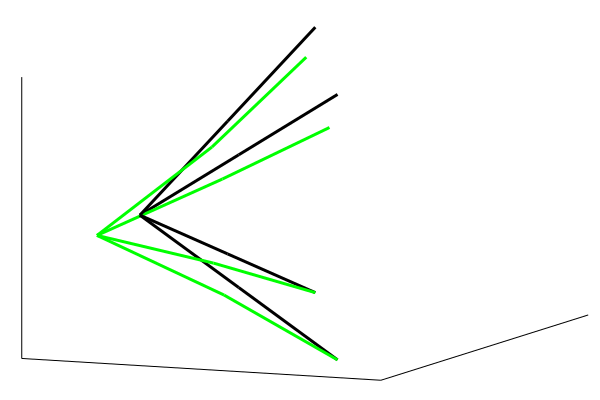

1
  0.074823 seconds (301.80 k allocations: 53.121 MiB, 20.26% gc time)


In [290]:
fileName="compliant_symmetry.json"
scale=1
dmax=-1
maxeval=500
threshold=0.9
exageration=0.0001
amax=1.0
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);


In [291]:
threshold=0.8
setup = getSetup("json/$fileName")
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
# display(plotTrussDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_truss(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_$(fileName)",threshold)

5102

## Auxetic

"Original Domain:"

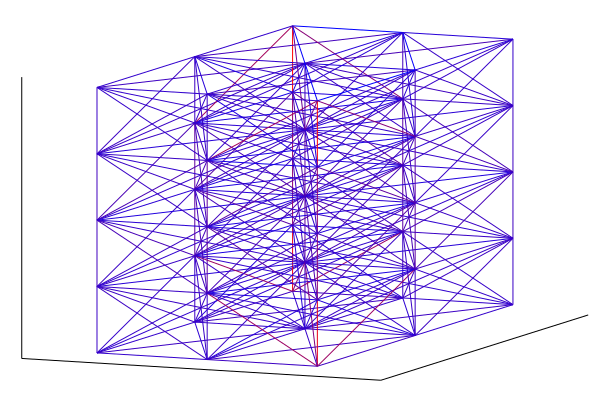

"Optimization Details:"

(108.99682922158031, [1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6  …  1.0e-6, 1.0e-6, 1.0, 1.0, 1.0, 1.0e-6, 1.0e-6, 1.0e-6, 1.0, 1.0e-6], :XTOL_REACHED)

"got 108.99682922158031 after 15 iterations (returned XTOL_REACHED)"

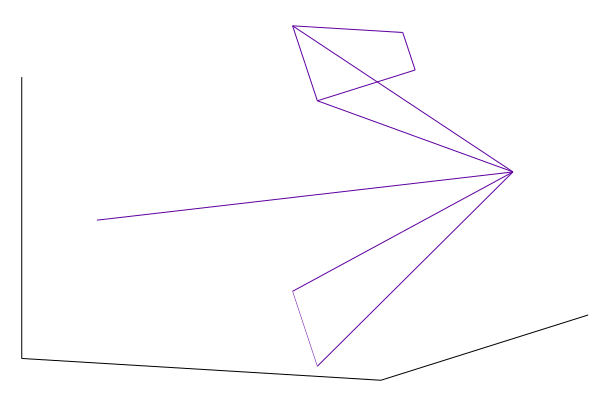

"Final Design:"

"max:1.0, min:1.0e-6"

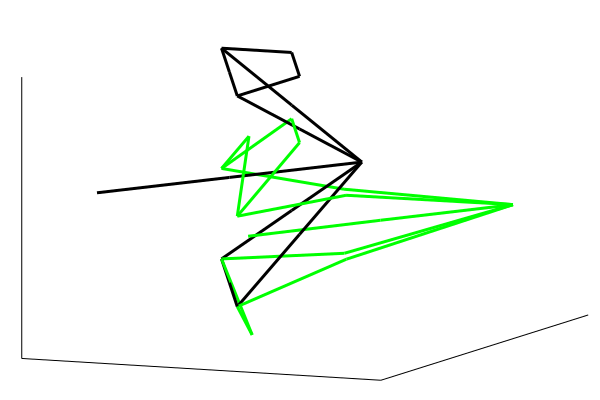

1
  0.044715 seconds (251.50 k allocations: 44.269 MiB)


In [292]:
fileName="auxetic_symmetry.json"
scale=1
dmax=-1
maxeval=2000
threshold=0.1
exageration=0.001
amax=1.0
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);


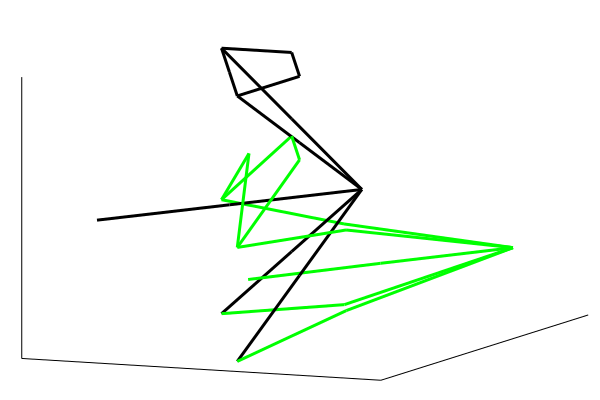

8162

In [264]:
threshold=0.8
setup = getSetup("json/$fileName")
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotTrussDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_truss(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_$(fileName)",threshold)

## Chiral

"Original Domain:"

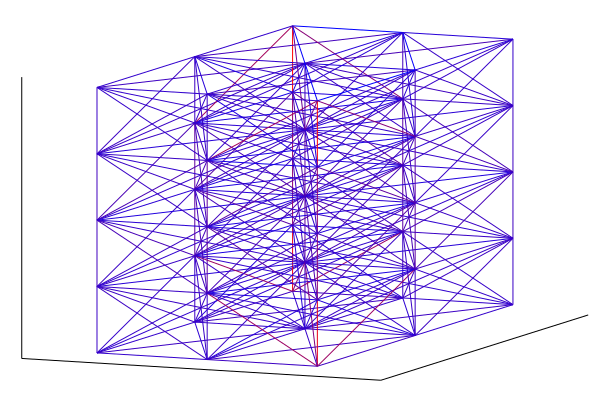

"Optimization Details:"

1


(134.1078990346156, [1.0e-6, 1.0e-6, 1.0e-6, 0.059462215419455344, 1.0e-6, 1.0e-6, 1.0e-6, 0.8381275164501372, 1.0e-6, 1.0e-6  …  1.0e-6, 0.5138110114111197, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6, 1.0e-6], :XTOL_REACHED)

"got 134.1078990346156 after 44 iterations (returned XTOL_REACHED)"

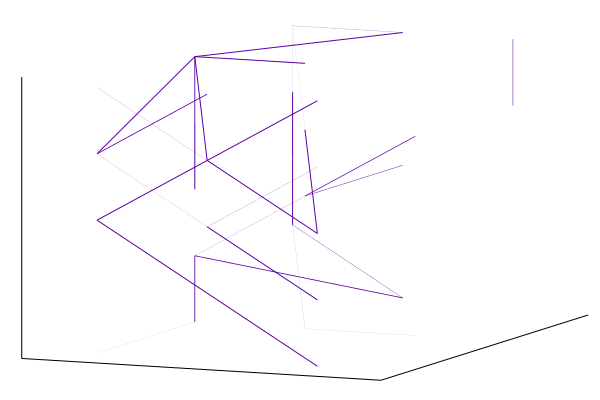

"Final Design:"

"max:1.0, min:1.0e-6"

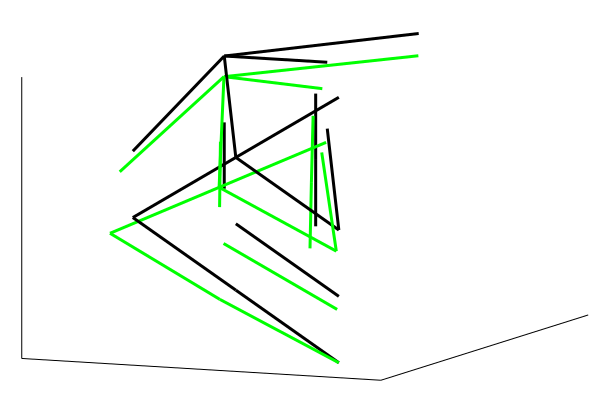

"max:1.0, min:1.0e-6"

  0.142098 seconds (737.71 k allocations: 129.837 MiB, 15.90% gc time)


In [293]:
fileName="twist_symmetry.json"
scale=1.0
dmax=-1
maxeval=2000
exageration=0.0001
amax=1.0
threshold=amax*0.9
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);
display("max:$(maximum(X)), min:$(minimum(X))")

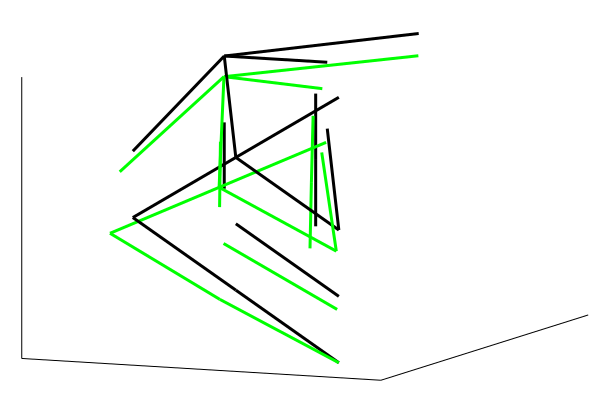

9903

In [269]:
threshold=amax*0.99
setup = getSetup("json/$fileName")
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotTrussDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_truss(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_$(fileName)",threshold)

## Shear

"Original Domain:"

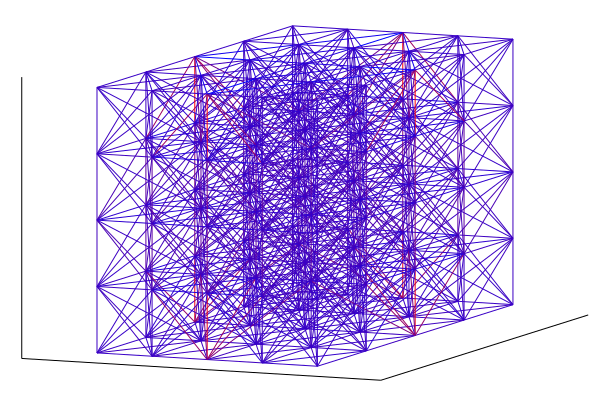

"Optimization Details:"

4


(1049.1643367939664, [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.17304938742046194, 0.001, 0.19050447807473603  …  0.001, 0.001, 0.001, 1.0, 0.001, 0.001, 0.2880126691943726, 0.001, 0.001, 0.001], :XTOL_REACHED)

"got 1049.1643367939664 after 217 iterations (returned XTOL_REACHED)"

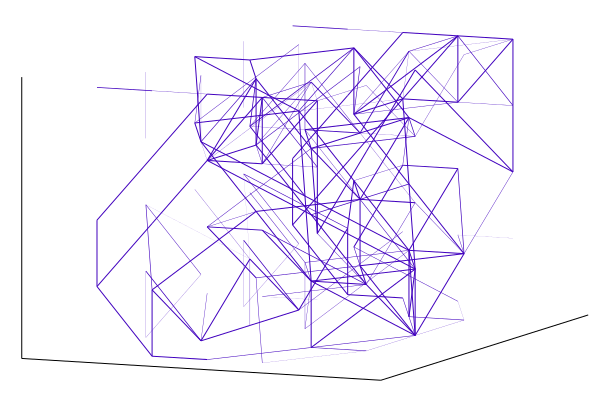

"Final Design:"

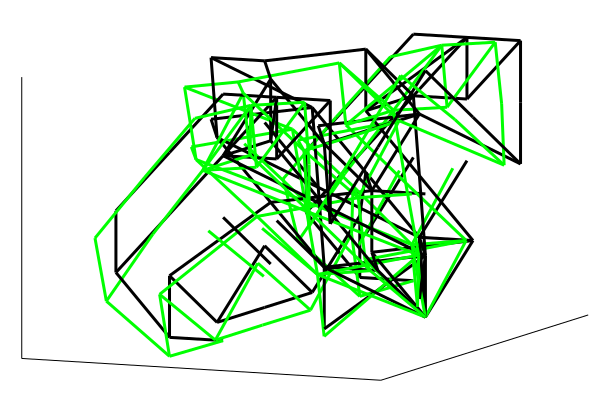

1.0

 12.839574 seconds (50.43 M allocations: 10.556 GiB, 17.75% gc time)


In [144]:
fileName="shear.json"
scale=1.0
dmax=-1000
maxeval=2000
exageration=0.1
amax=1.0
threshold=amax*0.9
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);
display(maximum(X))

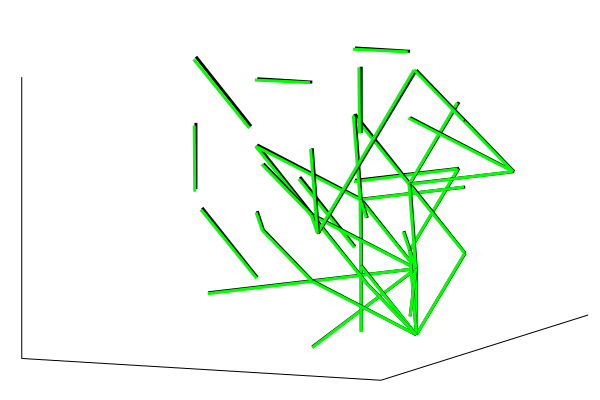

26992

In [141]:
threshold=amax*0.8
setup = getSetup("json/$fileName")
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotTrussDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_truss(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_$(fileName)",threshold)

## Shear Dense

"Original Domain:"

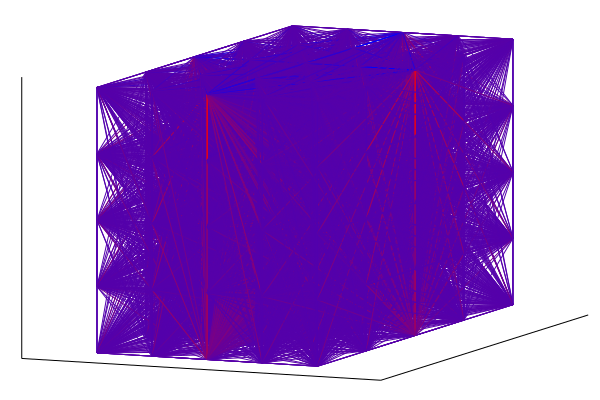

"Optimization Details:"

4


(63337.66554985558, [0.4999999993632749, 0.4999999979703217, 0.49999999655216076, 0.49999999594063926, 0.4999999803493048, 0.4999999998339791, 0.49999997580489086, 0.4999999888184538, 0.4999999991071036, 0.4999999612372059  …  0.4999999972055164, 0.49999999647612287, 0.4999999956252168, 0.499999992952246, 0.4999999990883376, 0.4999999981766752, 0.4999999956252168, 0.4999999990883376, 0.49999999647612287, 0.4999999972055164], :XTOL_REACHED)

"got 63337.66554985558 after 2 iterations (returned XTOL_REACHED)"

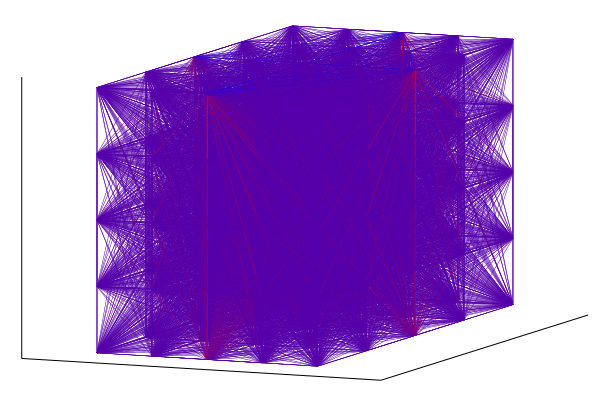

"Final Design:"

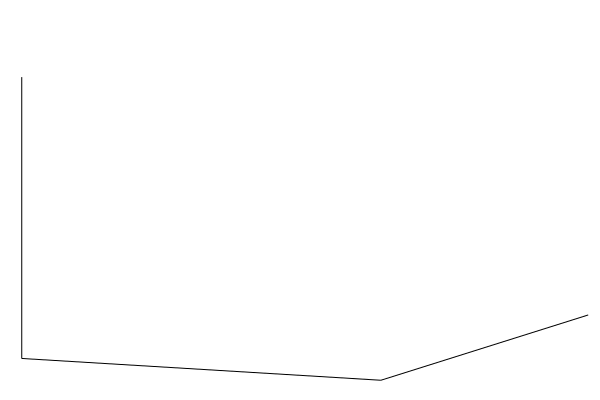

0.5000553137257212

  8.635754 seconds (3.47 M allocations: 733.199 MiB, 2.13% gc time)


In [150]:
fileName="shear1.json"
scale=1.0
dmax=-1000
maxeval=2000
exageration=0.01
amax=1.0
threshold=amax*0.9
SIMP=false
X=complianMechanismOptimization(fileName,scale,dmax,amax,maxeval,SIMP,threshold,exageration);
display(maximum(X))

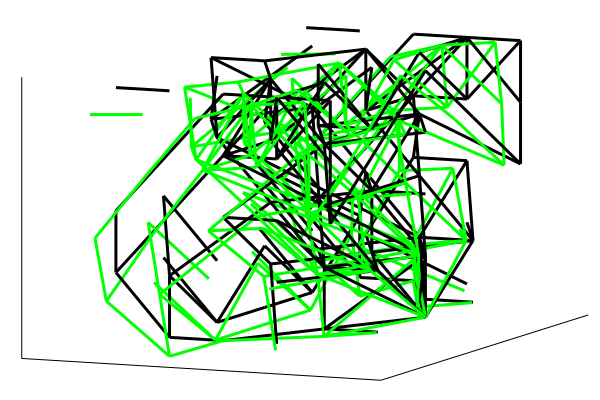

63985

In [146]:
threshold=amax*0.4
setup = getSetup("json/$fileName")
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotTrussDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_truss(problem,X);
simulateAndExport(setup,X,dcomp,"json/result_$(fileName)",threshold)